# Text Classification
**We train a model on a movie review dataset for binary sentiment classification.**

## Data
Data Source: http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/moviereviews.csv")

In [3]:
df.head()

label                                             review
0   neg  how do films like mouse hunt get into theatres...
1   neg  some talented actresses are blessed with a dem...
2   pos  this has been an extraordinary year for austra...
3   pos  according to hollywood movies made in last few...
4   neg  my first press screening of 1998 and already i...

## Exploratory Data Analysis on Bag of Words

In [4]:
df.isna().sum()

label      0
review    35
dtype: int64

In [5]:
df.dropna(inplace=True)

**Number of blank reviews to be discarded:**

In [6]:
df["review"].str.isspace().sum()

27

In [7]:
df = df[~df["review"].str.isspace()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [9]:
df["label"].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
count_vect = CountVectorizer(stop_words="english")

**We extract the top 20 words used in positive and negative reviews.**

In [12]:
pos_matrix = count_vect.fit_transform(df[df["label"] == "pos"]["review"])
print("Top 20 words used in positive reviews:")
pos_words = pd.DataFrame(
    data=pos_matrix.toarray(), columns=count_vect.get_feature_names_out()
)
pos_words.sum().sort_values(ascending=False).head(20)

Top 20 words used in positive reviews:


film          5002
movie         2389
like          1721
just          1273
story         1199
good          1193
time          1175
character     1037
life          1032
characters     957
way            864
films          851
does           828
best           788
people         769
make           764
little         751
really         731
man            728
new            702
dtype: int64

In [13]:
neg_matrix = count_vect.fit_transform(df[df["label"] == "neg"]["review"])
print("Top 20 words used in negative reviews:")
neg_words = pd.DataFrame(
    data=neg_matrix.toarray(), columns=count_vect.get_feature_names_out()
)
neg_words.sum().sort_values(ascending=False).head(20)

Top 20 words used in negative reviews:


film          4063
movie         3131
like          1808
just          1480
time          1127
good          1117
bad            997
character      926
story          908
plot           888
characters     838
make           813
really         743
way            734
little         696
don            683
does           666
doesn          648
action         635
scene          634
dtype: int64

## Machine Learning
**We fit a Linear SVC model on the TF-IDF vector of the text data and do a performance evaluation.**

In [14]:
X = df["review"]
y = df["label"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [18]:
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



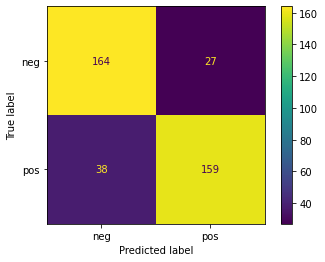

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);